In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #we only need plot
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\DIP VSCode\\data.csv")
data.shape

(232, 17)

In [4]:
data.head(0)

,url,url_length,num_dash,num_dot,num_ampersand,num_percent,num_numeric,is_https,has_ip_address,query_length,num_query,hostname_length,num_iframe,num_external_url,num_external_resources,num_null_self_redirect_hyperlink,status


In [5]:
data.columns

Index(['url', 'url_length', 'num_dash', 'num_dot', 'num_ampersand',
       'num_percent', 'num_numeric', 'is_https', 'has_ip_address',
       'query_length', 'num_query', 'hostname_length', 'num_iframe',
       'num_external_url', 'num_external_resources',
       'num_null_self_redirect_hyperlink', 'status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   url                               232 non-null    object
 1   url_length                        232 non-null    int64 
 2   num_dash                          232 non-null    int64 
 3   num_dot                           232 non-null    int64 
 4   num_ampersand                     232 non-null    int64 
 5   num_percent                       232 non-null    int64 
 6   num_numeric                       232 non-null    int64 
 7   is_https                          232 non-null    int64 
 8   has_ip_address                    232 non-null    int64 
 9   query_length                      232 non-null    int64 
 10  num_query                         232 non-null    int64 
 11  hostname_length                   232 non-null    int64 
 12  num_iframe            

In [7]:
data_nourl = data.drop(['url'], axis=1)
data_nourl.head()

,url_length,num_dash,num_dot,num_ampersand,num_percent,num_numeric,is_https,has_ip_address,query_length,num_query,hostname_length,num_iframe,num_external_url,num_external_resources,num_null_self_redirect_hyperlink,status
0,37,0,3,0,0,0,0,0,0,0,19,0,0,0,0,0
1,77,0,1,0,0,17,0,0,0,0,23,0,1,0,0,1
2,18,0,2,0,0,0,0,0,0,0,11,0,12,0,13,0
3,81,0,2,0,0,21,0,0,0,0,27,0,1,0,0,1
4,42,0,2,0,0,0,0,0,0,0,34,0,112,0,0,0


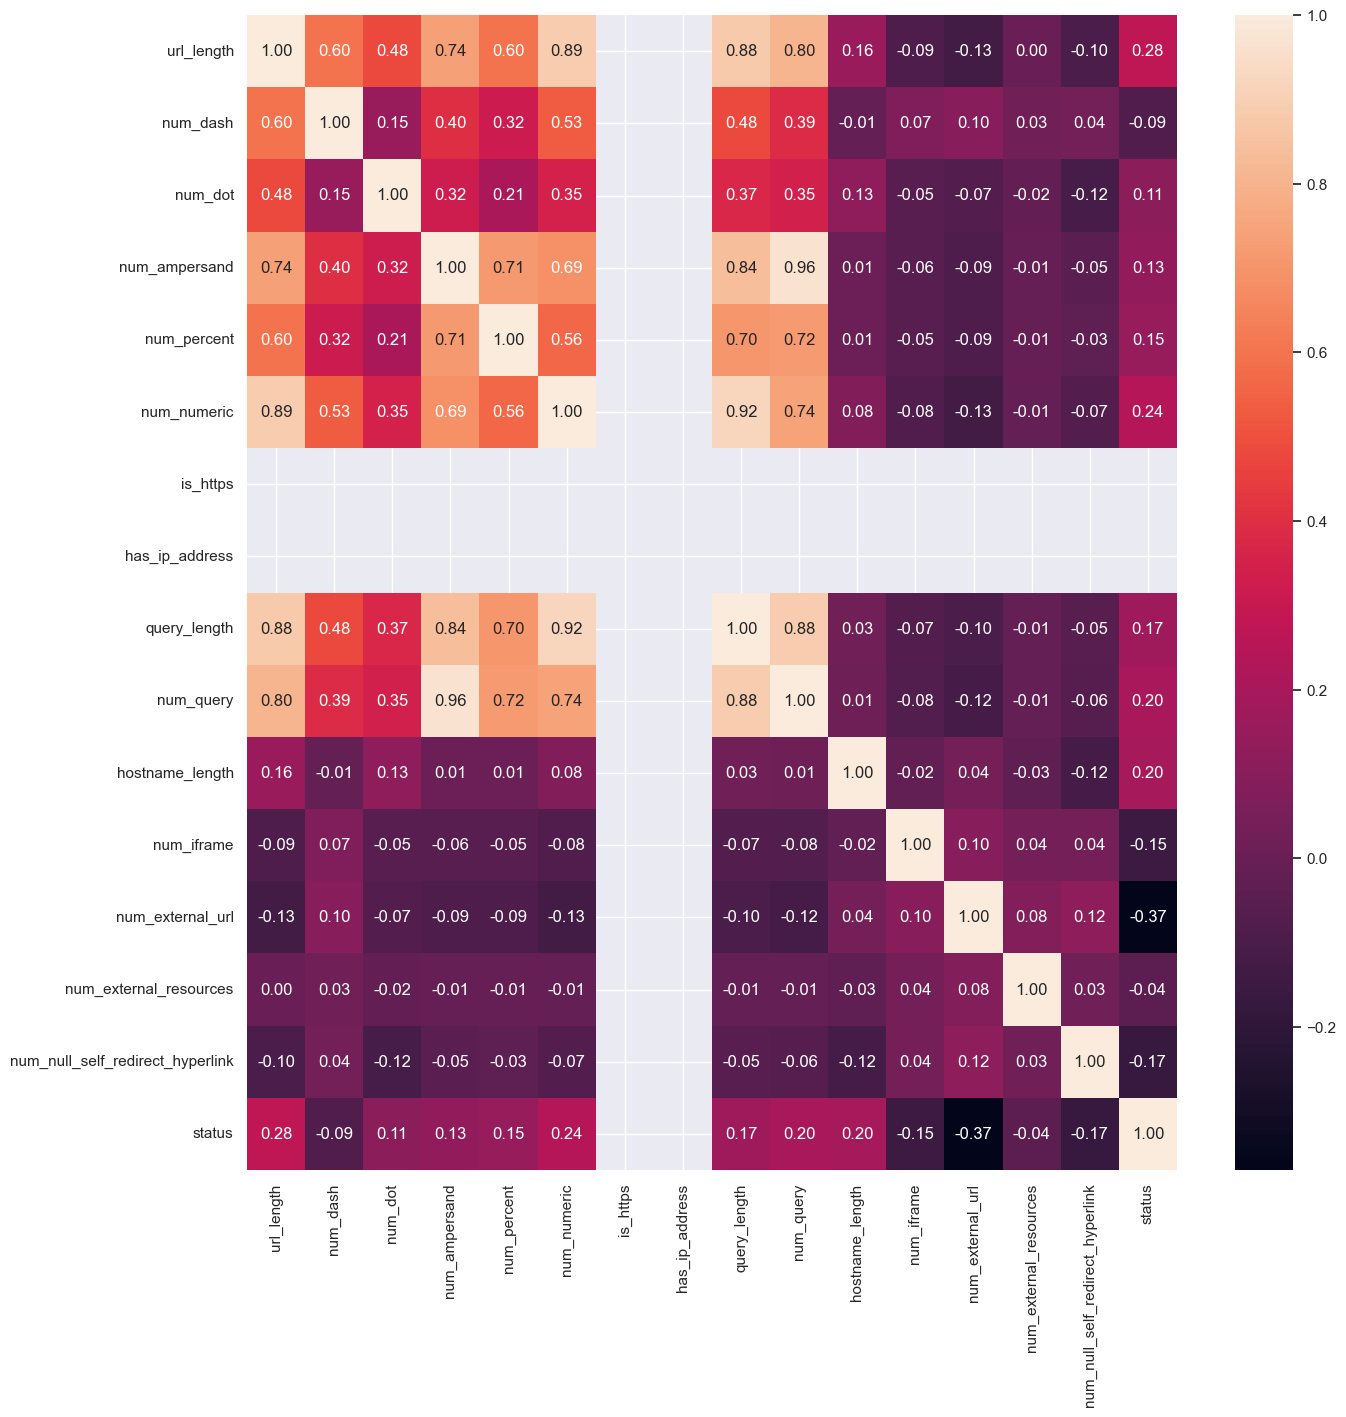

In [8]:
plt.figure(figsize=(15,15))
sb.heatmap(data_nourl.corr(), annot=True, fmt='.2f')
plt.show()

from the above correlation heatmap, we can see that the url length, number of dots, number of ambersands, number of percentage, number of numberic characters, and query length play a significant part in identifying malicious websites.

from the above correlation heatmap, we can that the number of queries, and the hostname length play a part in identifying the malicious websites

In [9]:
data_nourl_sample = data_nourl.sample(frac=1).reset_index(drop=True)
data_nourl_sample.head()

,url_length,num_dash,num_dot,num_ampersand,num_percent,num_numeric,is_https,has_ip_address,query_length,num_query,hostname_length,num_iframe,num_external_url,num_external_resources,num_null_self_redirect_hyperlink,status
0,29,0,2,0,0,0,0,0,0,0,22,1,224,0,0,0
1,55,0,3,0,0,2,0,0,0,0,20,1,9,0,0,0
2,21,0,2,0,0,0,0,0,0,0,14,0,29,0,0,0
3,72,1,3,1,0,6,0,0,6,2,17,0,7,0,0,0
4,65,0,2,0,0,0,0,0,0,0,16,0,119,0,1,0


In [10]:
y = data_nourl_sample['status'] #target variable
X = data_nourl_sample.drop('status',axis=1) #indpt var

In [59]:
y

0      0
1      0
2      0
3      0
4      0
      ..
227    0
228    0
229    0
230    0
231    0
Name: status, Length: 232, dtype: int64

In [58]:
1 in y

True

In [11]:
X.shape, y.shape

((232, 15), (232,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20% (or 30% KIV)
X_train.shape, X_test.shape

((185, 15), (47, 15))

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [15]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [17]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.951
Decision Tree: Accuracy on test Data: 0.915


In [18]:
def plot_feature_importances(model):
    #checking the feature  importance  in the model
    plt.figure(figsize=(9,7)) #preset size of figure
    n_features = X_train.shape[1] #define number of features to be shown
    plt.barh(range(n_features), model.feature_importances_, align='center') #initiate the horizontal bar plot
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

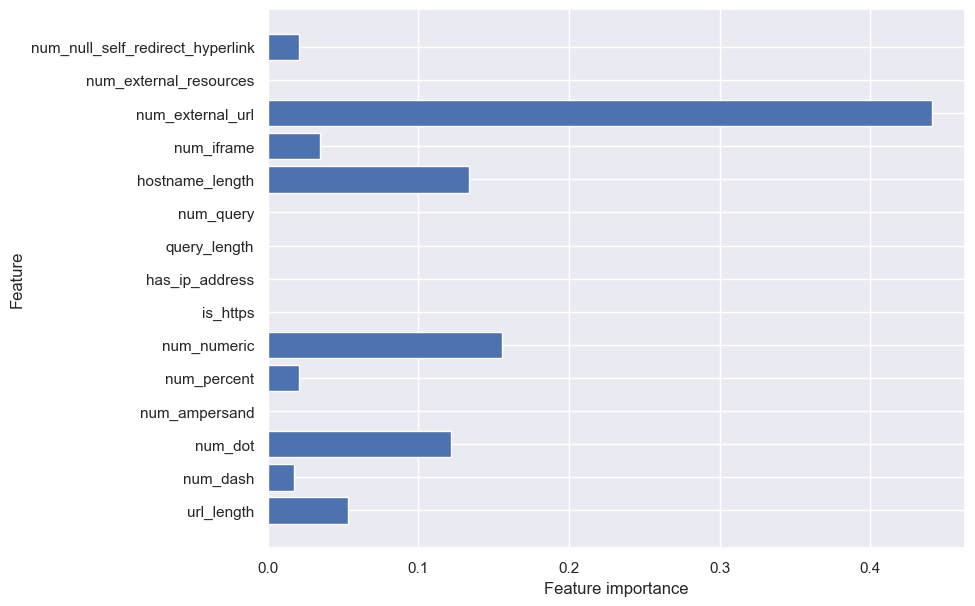

In [19]:
#checking the feature improtance in the model
plot_feature_importances(tree)

from this instance of classification model training, we can conclude that the feature from decision tree that is most likely to aid in identifying a malicious URL is the number of external url.

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

random forest classifier

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.935
Random forest: Accuracy on test Data: 0.915


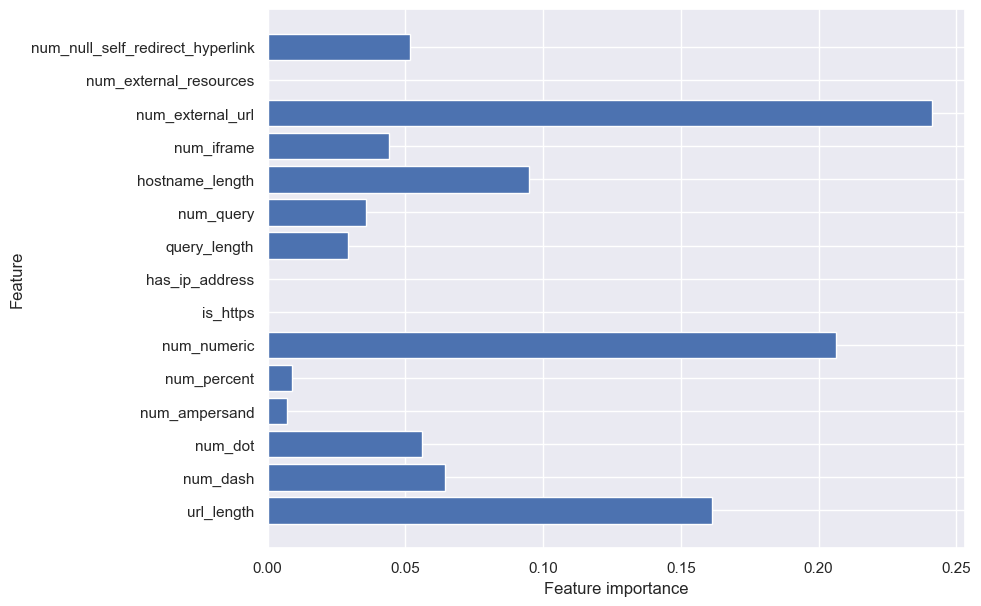

In [24]:
plot_feature_importances(forest)

from this instance of classification model training, we can conclude that the feature from random forest that is most likely to aid in identifying a malicious URL is also the number of external url, followed by the number of numeric characters, then URL length.

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)


multilayer perceptrons model

In [26]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [27]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Accuracy on training Data: 0.968
Multilayer Perceptrons: Accuracy on test Data: 0.872


In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)


In [30]:
#attempting to show feature importance using LIME (installed through pip)

#https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime

#https://analyticsindiamag.com/how-to-explain-ml-models-and-feature-importance-with-lime/



import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=mlp.predict_proba,
    num_features=len(data_nourl.columns) #15 columns for this version of dataset
)

exp.show_in_notebook(show_table=True)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loc

only useful if we have a few entries of URLs

moving forward, trying to use an alternative by attempting neural network feature importance

In [31]:
mlp.score(X_test,y_test)

0.8723404255319149

attempting to probe which feature are most predictive under MLP model using PERMUTATION IMPORTANCE function

In [32]:
#permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column

#https://scikit-learn.org/stable/modules/permutation_importance.html

from sklearn.inspection import permutation_importance
result = permutation_importance(mlp, X_test, y_test,
                           n_repeats=30, #sets the number of times a feature is randomly shuffled and returns a sample of feature importances
                           random_state=0)

for i in result.importances_mean.argsort()[::-1]: 
    #argsort "returns the indices that would sort an array"
    #slicing format: start, stop, step
    #[::-1] would reverse elements of the result.importances_mean list
    #baseline performance metric is more often than not referred to as the mean or average performance
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0: #taking two standard deviations away from the mean to account for 95% of the population
        print(f"{data_nourl.columns[i]:<10}" #name of the feature of interest
              f"{result.importances_mean[i]:.3f}" #importance mean
              f" +/- {result.importances_std[i]:.3f}") #importance standard deviation

num_external_url0.171 +/- 0.047
num_numeric0.092 +/- 0.032


from this instance of classification model training, we can conclude that the feature from multilayer perceptron that is most likely to aid in identifying a malicious URL is also the number of external url.

note that the importance values for the top features represent a fraction of the reference score of 0.915


xgboost

In [33]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dty

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dty

In [35]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))


XGBoost: Accuracy on training Data: 0.995
XGBoost : Accuracy on test Data: 0.936


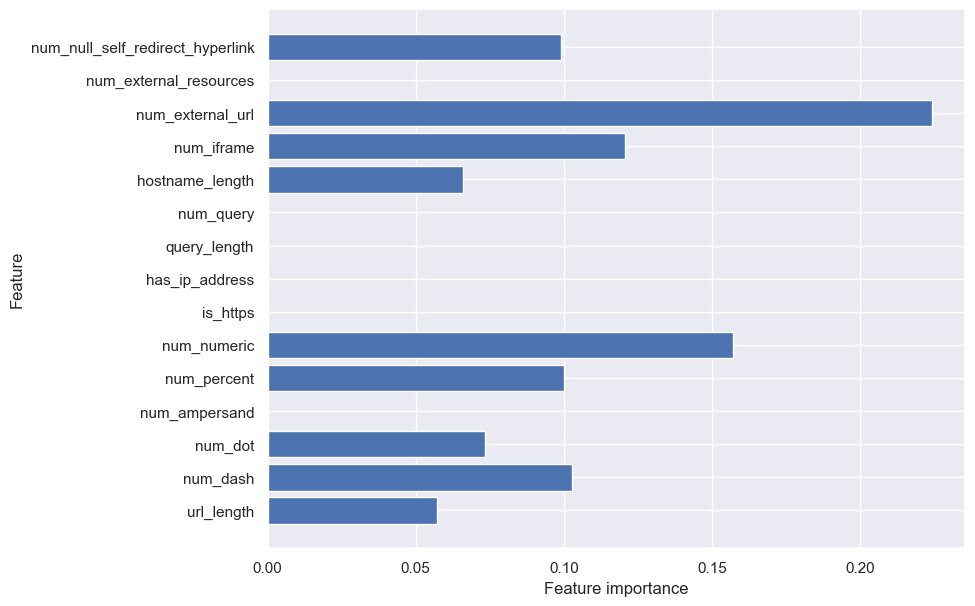

In [36]:
#call previously defined feature importance function
plot_feature_importances(xgb)

from this instance of classification model training, we can conclude that the feature from XGBoost that is most likely to aid in identifying a malicious URL is also the number of external url, followed by the number of numeric characters, and number of iframes.

In [37]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

support vector machines

In [38]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [39]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [40]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.832
SVM : Accuracy on test Data: 0.872


In [41]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [42]:
for col in data_nourl.columns:
    print(col)

url_length
num_dash
num_dot
num_ampersand
num_percent
num_numeric
is_https
has_ip_address
query_length
num_query
hostname_length
num_iframe
num_external_url
num_external_resources
num_null_self_redirect_hyperlink
status


In [43]:
for feature in svm.coef_:
    print(feature)

[ 0.03823314 -0.62636439 -0.49127281 -0.08561831  0.39929932  0.12448076
  0.          0.         -0.10404351  0.49696197  0.02982429  0.71692141
 -0.08629711  0.         -0.14745953]


In [44]:
feat = []
feat_imp = []

def storeFI(feature,feature_imp):
    feat.append(feature)
    feat_imp.append(feature_imp)


In [45]:
#https://saturncloud.io/blog/how-to-determine-the-most-contributing-features-for-svm-classifier-in-sklearn/#:~:text=Get%20the%20feature%20weights%3A%20After,the%20more%20important%20the%20feature.

#the coefficients represent the importance of each feature in the classification process.
#the higher the coefficient, the more important the feature
#obtained by using coef_ attribute of the SVM classifier
print("SVM: feature importance of\n")
for i in range(0,len(data_nourl.columns)-1):
    feature_ = data_nourl.columns[i]
    feature_imp_ = svm.coef_[0][i]
    storeFI(feature_,feature_imp_)
    print("{:>35}: {:.3f}".format(feature_,feature_imp_))

SVM: feature importance of

                         url_length: 0.038
                           num_dash: -0.626
                            num_dot: -0.491
                      num_ampersand: -0.086
                        num_percent: 0.399
                        num_numeric: 0.124
                           is_https: 0.000
                     has_ip_address: 0.000
                       query_length: -0.104
                          num_query: 0.497
                    hostname_length: 0.030
                         num_iframe: 0.717
                   num_external_url: -0.086
             num_external_resources: 0.000
   num_null_self_redirect_hyperlink: -0.147


In [54]:
#double-checking the number of features and that of feature importance match
len(feat),len(feat_imp)

(15, 15)

In [53]:
features = pd.DataFrame({'Feature': feat,
                        'Feature Importance': feat_imp})
features

,Feature,Feature Importance
0,url_length,0.038233
1,num_dash,-0.626364
2,num_dot,-0.491273
3,num_ampersand,-0.085618
4,num_percent,0.399299
5,num_numeric,0.124481
6,is_https,0.000000
7,has_ip_address,0.000000
8,query_length,-0.104044
9,num_query,0.496962


In [55]:
features.sort_values(by=['Feature Importance'], ascending=False)

,Feature,Feature Importance
11,num_iframe,0.716921
9,num_query,0.496962
4,num_percent,0.399299
5,num_numeric,0.124481
0,url_length,0.038233
10,hostname_length,0.029824
6,is_https,0.000000
7,has_ip_address,0.000000
13,num_external_resources,0.000000
3,num_ampersand,-0.085618


from this instance of classification model training, we can conclude that the feature from Support Vector Machine that is most likely to aid in identifying a malicious URL is the number of iframes, followed by the number of queries, then the number of percentage characters.

In [46]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.951,0.915
1,Random Forest,0.935,0.915
2,Multilayer Perceptrons,0.968,0.872
3,XGBoost,0.995,0.936
4,SVM,0.832,0.872


In [47]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)


,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.995,0.936
0,Decision Tree,0.951,0.915
1,Random Forest,0.935,0.915
2,Multilayer Perceptrons,0.968,0.872
4,SVM,0.832,0.872


justify optimal parameter for each classifier (e.g. max depth for tree)